# How to Run Interface

1. first run this on terminal/bash on your computer using
    ``pip install -r requirements.txt`` script
2. Then run the model using script
    ``python3 model.py``

# Documentation of Modelling process

In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import numpy as np
np.random.seed(1718)
import warnings
warnings.filterwarnings("ignore")

import kumparanian #test env

In [9]:
df = pd.read_csv("data.csv")

# Data Exploration

In [10]:
df.isna().sum()

article_id          0
article_topic       0
article_content    36
dtype: int64

In [11]:
df[df.isnull().any(axis=1)]

,article_id,article_topic,article_content
197,93210288,Teknologi,NaN
674,93185319,Hiburan,NaN
817,93189481,Hiburan,NaN
972,93184085,Otomotif,NaN
2015,93195291,Hiburan,NaN
2250,93201544,Hiburan,NaN
3276,93213891,Teknologi,NaN
4150,93197166,Hiburan,NaN
4338,93186717,Sepak Bola,NaN
4750,93224988,Sepak Bola,NaN


In [12]:
df = df.dropna()

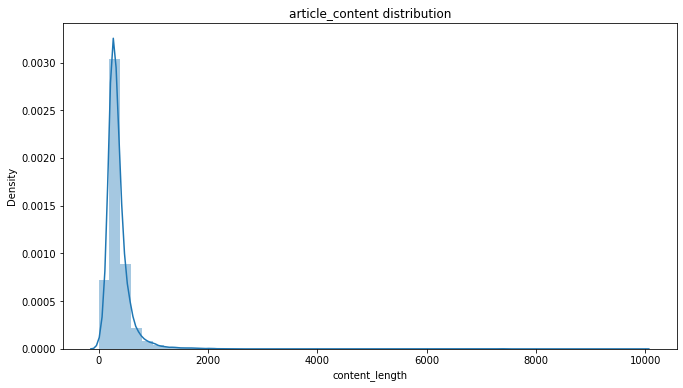

In [13]:
df['content_length'] = [len(x.split()) for x in df['article_content'].tolist()]
plt.figure(figsize=(11,6))
sns.distplot(df['content_length']).set_title('article_content distribution');
plt.show()

In [14]:
df['content_length'].describe()

count    9964.000000
mean      353.124548
std       297.024979
min         0.000000
25%       233.000000
50%       303.000000
75%       400.000000
max      9921.000000
Name: content_length, dtype: float64

In [15]:
df[df['content_length'] < 10]

,article_id,article_topic,article_content,content_length
418,93185667,Haji,tes,1
555,93181418,Hiburan,,0
971,93204251,Teknologi,"bisa dilihat disini, hak cipta bukan milik saya",8
1331,93191657,Hiburan,",",1
1432,93212920,Kesehatan,,0
1568,93198989,Sepak Bola,test,1
1582,93182448,Hukum,Panjang bener!,2
1601,93181411,Hiburan,,0
1927,93185665,Haji,tes,1
2031,93210296,Health,".,",1


In [16]:
df.drop(df[df['content_length'] < 5].index, inplace=True)

In [17]:
df = df.reset_index(drop=True)

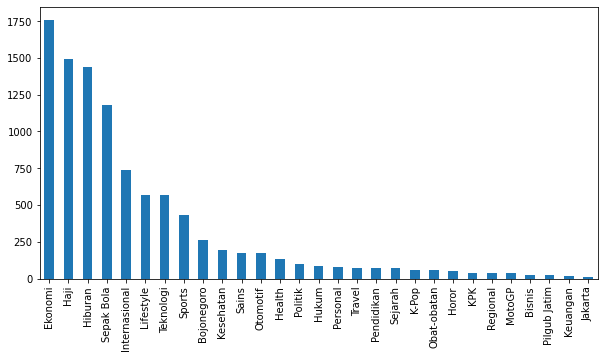

In [18]:
df['article_topic'].value_counts().plot(figsize=(10, 5), kind='bar')
plt.show()

In [19]:
df['content_length'].describe()

count    9934.000000
mean      354.188242
std       296.840804
min         8.000000
25%       234.000000
50%       303.000000
75%       400.000000
max      9921.000000
Name: content_length, dtype: float64

In [20]:
df.head()

,article_id,article_topic,article_content,content_length
0,93205794,Internasional,Kepolisian Inggris tengah memburu pelaku yang...,164
1,93186698,Ekonomi,Seluruh layanan transaksi di jalan tol akan m...,373
2,93191463,Teknologi,"\nHari ini, Rabu (23/8), ternyata menjadi har...",165
3,93219292,Ekonomi,Saat ini Indonesia hanya memiliki cadangan ba...,352
4,343106,Hiburan,"Hari ini, Selasa (1/8), pedangdut Ridho Rhoma...",281


Reports :
- There are 36 null data (Done)
- There is empty text and no content in it (Done)
- There is very long content reaching 9000 words but the average content contains approximatly 350 words
- There are 29 Class Targets
- There is an imbalance in the data with data dominated by the topics of Economy, Hajj, Entertainment, Football and International
- There are classes that look like they can be combined like 'health' and 'health' and 'k-pop' with 'entertainment but I'll leave the target class as it is

# Text Preprocessing and feature engineering for model

In [21]:
df['labels'] = df['article_topic'].factorize()[0]
from io import StringIO
category_id_df = df[['article_topic', 'labels']].drop_duplicates().sort_values('labels')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['labels', 'article_topic']].values)

In [22]:
def print_text(index):
    example = df[df.index == index][['article_content', 'article_topic']].values[0]
    if len(example) > 0:
        print(example[0])
        print('article_topic:', example[1])

In [23]:
print_text(2)

 
Hari ini, Rabu (23/8), ternyata menjadi hari yang spesial bagi tagar atau yang biasa disebut juga hashtag. Kenapa demikian? 23 Agustus ternyata menandai tepat 10 tahun pasca diciptakannya tagar (#) di media sosial Twitter.

Untuk merayakan hari ulang tahun ke-10 dari tagar, Twitter pun menghadirkan emoji khusus yang akan keluar ketika kita mengetikkan #Hashtag10 di platform media sosial tersebut.
 
Twitter memang menjadi platform media sosial yang mempopulerkan tagar, di mana tagar ini dapat menggabungkan seluruh kicauan dalam suatu topik yang sama ketika pengguna mengklik tagar tersebut.

Selain itu, Twitter juga merilis daftar 10 tagar yang paling populer yang digunakan oleh para penggunanya di Indonesia selama 10 tahun terakhir. Penasaran apa saja? Berikut daftarnya.

1. #OwiButetBisaEmas2. #Salam2Jari3. #KamiTidakTakut4. #SaveKPK5. #Euro20166. #PersibDay7. #MUFC8. #MelawanAsap9. #DemiMetallica10. #JumatBerkah
 
Dari deretan tagar terpopuler ini terlihat bagaimana animo masyarakat

##### After looking through the contents of some content, I think, I don't need to clean up too complex text just work with symbols, numbers and capital letters

In [26]:
from nlp_id.stopword import StopWord 
from nlp_id.lemmatizer import Lemmatizer 

In [27]:
lemmatizer = Lemmatizer() 
stopword = StopWord()

In [28]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['article_content'][i])
    review = lemmatizer.lemmatize(review)
    review = stopword.remove_stopword(review)
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

In [29]:
df['corpus'] = corpus

In [30]:
df.sample(5)

,article_id,article_topic,article_content,content_length,labels,corpus
5084,93192326,Teknologi,Sejak beroperasi di Indonesia pada Maret 2016...,327,2,operasi indonesia maret pabrik ponsel pintar v...
891,93228238,Travel,Banyuwangi menjadi kota pertama di Indonesia ...,196,5,banyuwangi kota indonesia milik bandara konsep...
2444,93194933,Haji,Mekah ( MCH) - Menteri Agama Lukman Hakim Sai...,316,4,mekah mch menteri agama lukman hakim saifuddin...
9447,93231306,Bojonegoro,Reporter: M. SafuanblokBojonegoro.com - Pipa ...,146,20,reporter m safuanblokbojonegoro com pipa minya...
7400,93204293,Teknologi,Mendapatkan lisensi e-money dari Bank Indones...,234,2,lisensi e money bank indonesia impi startup di...


In [31]:
def print_corpus(index):
    example = df[df.index == index][['corpus', 'article_topic']].values[0]
    if len(example) > 0:
        print(example[0])
        print('article_topic:', example[1])

In [32]:
print_corpus(2)

nyata spesial tagar hashtag agustus nyata tanda pasca cipta tagar media sosial twitter raya ulang tagar twitter hadir emoji khusus etik hashtag platform media sosial twitter platform media sosial mempopulerkan tagar tagar gabung kicau topik klik tagar twitter rilis daftar tagar populer indonesia penasaran daftar owibutetbisaemas salam jari kamitidaktakut savekpk euro persibday mufc melawanasap demimetallica jumatberkah deret tagar populer lihat animo masyarakat sebar topik tagar kena politik olahraga konser metallica jakarta hingga buah nyata kamitidaktakut gema pasca serang teroris tanah air tagar favorit
article_topic: Teknologi


### Simple test untuk mencoba dataset

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df['corpus'], df['article_topic'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = LinearSVC().fit(X_train_tfidf, y_train)

In [35]:
test_case = 'Kepolisian Inggris tengah memburu pelaku yang meledakkan bom di stasiun London. Sedikitnya 22 orang terluka dalam peristiwa yang terjadi pada Jumat pagi yang sibuk (15/9).Menurut asisten komisaris kepolisian Inggris Mark Rowley seperti dikutip The Guardian, ratusan detektif dikerahkan untuk menyelidiki kasus ini. Mereka akan memeriksa semua rekaman CCTV di jaringan kereta bawah tanah London untuk mencari pelakunya.Sebelumnya kepolisian telah menangani kasus ini sebagai aksi terorisme. Penyelidikan juga dilakukan oleh Komando Pemberantasan Terorisme Kepolisian London dan badan keamanan dalam negeri Inggris MI5.Ledakan terjadi di stasiun Parsons Green di salam satu gerbong kereta. Peristiwa ini memicu kepanikan ratusan penumpang yang langsung berhamburan menyelamatkan diri. Sedikitnya 22 orang terluka, namun tidak mengancam nyawa.Menurut kepolisian, bom rakitan itu belum sepenuhnya meledak. Tim forensik akan menyelidiki bom itu, mencari tahu bahan kimia yang digunakan, dan dari mana pelaku mempelajari pembuatannya.Inggris telah mengalami empat kali serangan teroris tahun ini, menewaskan 36 orang. Tahun 2005, 52 orang tewas dalam ledakan bunuh diri di tiga kereta bawah tanah London dan sebuah bus.'

In [36]:
print(clf.predict(count_vect.transform([test_case])))

['Internasional']


## Test model begin

I will try to use the simplest model instead of complex algorithms because my assumption is this model will be used daily, and it is easy to maintain and update the model in the future to get new data.

The ML algorithm that I use for benchmarking this time is Random Forest, Naive Bayes (Multinominal), SVM Classification, and Decision Tree.

I will use accuracy and choose the algorithm with the highest accuracy (with minimum threshold > 75%)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cv = CountVectorizer()
cvf = cv.fit_transform(df['corpus'].values)
tfidfconverter = TfidfTransformer()
features = tfidfconverter.fit_transform(cvf)
labels = df.labels

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0, criterion='entropy'),
    LinearSVC(),
    MultinomialNB(),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [39]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.686633
LinearSVC                 0.880109
MultinomialNB             0.669721
RandomForestClassifier    0.531608
Name: accuracy, dtype: float64

Karena algoritma LiniearSVC bekerja dengan baik pada dataset ini dengan akurasi 88%, saya akan menggunakannya sebagai baseline model untuk interface nanti

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

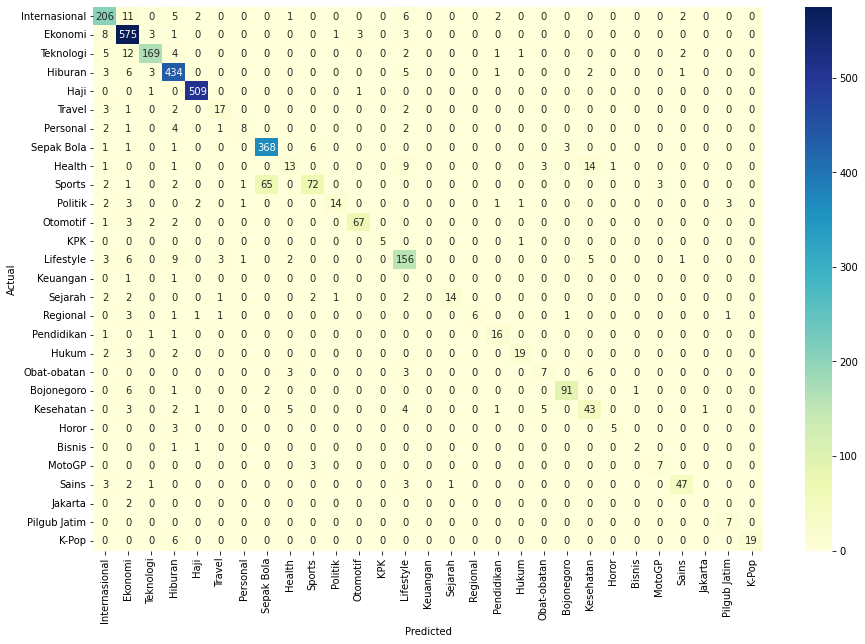

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=category_id_df.article_topic.values, yticklabels=category_id_df.article_topic.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [42]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       235
           1       0.90      0.97      0.93       594
           2       0.94      0.86      0.90       196
           3       0.90      0.95      0.93       455
           4       0.99      1.00      0.99       511
           5       0.74      0.68      0.71        25
           6       0.73      0.44      0.55        18
           7       0.85      0.97      0.90       380
           8       0.54      0.31      0.39        42
           9       0.87      0.49      0.63       146
          10       0.88      0.52      0.65        27
          11       0.94      0.89      0.92        75
          12       1.00      0.83      0.91         6
          13       0.79      0.84      0.81       186
          14       0.00      0.00      0.00         2
          15       0.93      0.58      0.72        24
          16       1.00      0.43      0.60        14
          17       0.73    

From the report, the class that is difficult to predict is the class `[8, 14, 19, 21, 23, 27]` with precision (Due to data imbalance) and
To better understand the model, I would like to see which targets the model often mispredicts and how the content of articles behaves

In [43]:
lower_precission_class = [8, 14, 19, 21, 23, 27]
for n in lower_precission_class:
    print(id_to_category[n])

Health
Keuangan
Obat-obatan
Kesehatan
Bisnis
Pilgub Jatim


In [44]:
from IPython.display import display

for predicted in category_id_df.labels:
    for actual in category_id_df.labels:
        if predicted != actual and conf_mat[actual, predicted] >= 6:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['article_topic', 'corpus']])
            print('')

'Ekonomi' predicted as 'Internasional' : 8 examples.


,article_topic,corpus
9519,Ekonomi,komisi xi dpr gelar rapat kerja menteri uang s...
6168,Ekonomi,presiden amerika serikat donald trump temu ket...
5973,Ekonomi,konflik rakhine myanmar pekan sorot dunia nega...
7177,Ekonomi,toyota motor corp henti produksi pabrik rakit ...
7972,Ekonomi,toys r us amerika serikat nyata aju pailit uan...
1255,Ekonomi,pt equity world futures pusat duta besar cende...
4347,Ekonomi,perintah incar wisatawan asing kunjung indones...
326,Ekonomi,pt equityworld futures pusat harga emas turun ...



'Internasional' predicted as 'Ekonomi' : 11 examples.


,article_topic,corpus
3932,Internasional,buah kapal tanker indonesia tabrak kapal keruk...
3449,Internasional,presiden indonesia joko widodo perdana menteri...
574,Internasional,pakistan batubara indonesia juta jamshoro powe...
994,Internasional,kjri chicago bekerjasama konsulat jenderal fil...
7961,Internasional,menteri negeri retno marsudi laku temu bilater...
2376,Internasional,usaha khadija edible oil refinery rupa impor m...
5276,Internasional,malaysia bakar perahu nelayan asing cari ikan ...
1887,Internasional,panas global ancam lingkung picu tingkat angka...
4852,Internasional,perintah indonesia rencana kunjung sekretaris ...
5931,Internasional,rupa bisnis investasi bangladesh hubung bilate...



'Teknologi' predicted as 'Ekonomi' : 12 examples.


,article_topic,corpus
3043,Teknologi,era serba digital situs e commerce bayar digit...
8520,Teknologi,hyperloop kembar kejut rencana hyperloop uji c...
2831,Teknologi,google kenal kreatif lingkung kantor unik appl...
3437,Teknologi,mahkamah agung ma perintah menteri hubung cabu...
39,Teknologi,ilustrasi bitcoin ethereum foto flickr berita ...
18,Teknologi,jalan kereta commuter line pagi ganggu anjlok ...
4527,Teknologi,ribut jalar dunia trading digital currency har...
8362,Teknologi,malang kabarpas com era laku ukm milik peran a...
7667,Teknologi,perintah rusia muka rencana cipta cryptocurren...
2111,Teknologi,anies baswedan sandiaga uno resmi lantik guber...



'Hiburan' predicted as 'Ekonomi' : 6 examples.


,article_topic,corpus
4665,Hiburan,presenter acara talkshow mata najwa najwa shih...
3398,Hiburan,najwa shihab kenal presenter talk show mata na...
9918,Hiburan,jelang ajang kontes cantik internasional langs...
3814,Hiburan,nama raline shah bincang postingan instagram c...
6775,Hiburan,pikat akting rupa raline shah tarik perhati du...
7001,Hiburan,ruben onsu kecewa hadap buah maskapai terbang ...



'Lifestyle' predicted as 'Ekonomi' : 6 examples.


,article_topic,corpus
9274,Lifestyle,isi parsel lihat rupa snack minum ringan baran...
9333,Lifestyle,sedap buron rumah tangga pekan garam pasar sul...
1819,Lifestyle,p t d duduk desa sumatera utara bal timur kali...
8985,Lifestyle,buah transportasi laku atur larang tumpang baw...
6883,Lifestyle,rencana wisata kuliner list restoran pilih kun...
3515,Lifestyle,besar pasak tiang nampaknya pribahasa gambar t...



'Bojonegoro' predicted as 'Ekonomi' : 6 examples.


,article_topic,corpus
4022,Bojonegoro,reporter maratus shofifahblokbojonegoro com pe...
5996,Bojonegoro,reporter maratus shofifahblokbojonegoro com kr...
3315,Bojonegoro,reporter m yazidblokbojonegoro com letak batu ...
3353,Bojonegoro,reporter m safuanblokbojonegoro com giat opera...
3009,Bojonegoro,reporter parto sasmitoblokbojonegoro com targe...
7225,Bojonegoro,reporter nur muharromblokbojonegoro com proyek...



'Lifestyle' predicted as 'Hiburan' : 9 examples.


,article_topic,corpus
1237,Lifestyle,tak kenal nama rinaldy a yunardi desainer akse...
3838,Lifestyle,kembang zaman tato tak gambar bunga jangkar ka...
1194,Lifestyle,pagi berita duka dr ryan thamrin pandu acara d...
8518,Lifestyle,menteri budaya olahraga pariwisata korea selat...
1874,Lifestyle,film horor seru nontonnya ajak teman anti nont...
8528,Lifestyle,libur ngobrol mata anak perempuan remaja ngobr...
2571,Lifestyle,pro kontra suami istri alias poligami isu hang...
7254,Lifestyle,artikel bagus bahas komik donald duck coba bed...
6938,Lifestyle,wingardium leviosa cinta film fantasi sihir ta...



'K-Pop' predicted as 'Hiburan' : 6 examples.


,article_topic,corpus
8239,K-Pop,dreamcatcher kejut gemar rilis buah video inda...
6049,K-Pop,idola k pop jalin kisah asmara orang perkara m...
7493,K-Pop,pentol boyband bigbang kwon jiyoung g dragon g...
1127,K-Pop,acara countdown asi games gelar malam kawasan ...
7055,K-Pop,rahasia korea identik k pop k drama jepang ide...
8802,K-Pop,fans exo baper member exo china kris luhan tao...



'Sports' predicted as 'Sepak Bola' : 65 examples.


,article_topic,corpus
665,Sports,virus fifa main tim tim besar eropa alam ceder...
2162,Sports,momok lawas hantu arsenal francis coquelin mes...
7042,Sports,arsenal takluk norwich city skor ajang babak b...
8794,Sports,manchester city catat sempurna premier league ...
6640,Sports,suasana kamp everton senang duit juta poundste...
...,...,...
828,Sports,sepakbola indonesia pssi sorot sanksi persib b...
3671,Sports,laga big match temu liverpool manchester unite...
1303,Sports,musim manchester united tampil buruk premier l...
1329,Sports,bursa transfer klub klub inggris tutup agustus...



'Sepak Bola' predicted as 'Sports' : 6 examples.


,article_topic,corpus
2267,Sepak Bola,ac mil telan kalah takluk tim kuat as roma sko...
1121,Sepak Bola,langkah wales kian rusia sukses raih menang ti...
519,Sepak Bola,tim sepak bola indonesia tingkat positif hal l...
4488,Sepak Bola,atlet atletik difabel indonesia suparni yati s...
5124,Sepak Bola,italia puas raih angka tahan imbang makedonia ...
4024,Sepak Bola,san paolo napoli temu atalanta pekan serie a i...



'Internasional' predicted as 'Lifestyle' : 6 examples.


,article_topic,corpus
5381,Internasional,sampah sampah selokan indonesia daun plastik b...
4913,Internasional,perintah inggris resmi larang edar cokelat bat...
3032,Internasional,buah teliti kendali mimpi kontrol mimpi sensas...
3118,Internasional,marak potret hamil gaya gemas emily mueller pe...
9704,Internasional,canggih cepat teknologi mudah hidup manusia or...
5607,Internasional,raya takhta sultan hassanal bolkiah mu izzaddi...



'Health' predicted as 'Lifestyle' : 9 examples.


,article_topic,corpus
5135,Health,hallo bunda moga tegar hadap gugur ledies meng...
7555,Health,selamat postingan admin bahas artikel manfaat ...
7307,Health,the healthy perfect food slogan sebar perintah...
5668,Health,walatra sehat mata softgel walatra sehat mata ...
7987,Health,orang tua patut hati hati sakit infeksi paru p...
2580,Health,kanker lidah salah jenis kanker mulut mulut ka...
6523,Health,pasang nikah milik anak pasang nikah hitung ka...
1249,Health,mangkuk nasi matang kandung kalori tak bakar u...
3326,Health,jeruk rupa salah jenis buah milik gemar buah j...



'Health' predicted as 'Kesehatan' : 14 examples.


,article_topic,corpus
6683,Health,selamat distory zahra herbal gejala kanker lid...
9711,Health,osteoarthritis istilah awam kapur tulang rusak...
2760,Health,g sea jelly jelly gamat walatra g sea jelly je...
2948,Health,kolera rupa infeksi bakteri derita derita dehi...
4454,Health,bersih telinga bersih cotton bud dorong earwas...
3641,Health,sembuh asam lambung totalpenyakit asam lambung...
1892,Health,obat nyeri sendi timbul sakit orang salep gel ...
8444,Health,sistem nafas manusia milik tugas sulit orang n...
9482,Health,lupus salah sakit kronis serang tubuh manusia ...
5526,Health,teh hijau percaya jaga sehat orang orang china...



'Obat-obatan' predicted as 'Kesehatan' : 6 examples.


,article_topic,corpus
7495,Obat-obatan,sakit radang usus buntu radang usus buntu kond...
722,Obat-obatan,sakit wasir istilah medis hemoroid bengkak bul...
6169,Obat-obatan,obat osteoporosis herbal alami wanita ampuh da...
6070,Obat-obatan,sakit miom sakit miom kondisi tumbuh tumor atu...
5606,Obat-obatan,epigastrium kenal nyeri ulu hati sakit akibat ...
963,Obat-obatan,ampuh hilang bekas jerawat cepat jerawat kulit...


Okay, in some classes, the article content does (assumes) contain words that describe a high correlation to other classes so that the model becomes incorrect in predictions, for example:
- President of `United States Donald Trump will . . . in the prediction of 'International' when it should be 'Economics.'
- What is the `disease` of appendicitis.? Inflammation of the intestines... predicts 'Health' when it should be 'Medicine.'
- and some target class `health` predicted `health` which are indeed similar in terms of word correlation in content

# Final Model

In [45]:
final_model = LinearSVC(verbose=1)

In [46]:
final_cv = CountVectorizer()
cvf = final_cv.fit_transform(df['corpus'].values)
final_tfidfconverter = TfidfTransformer()
features = final_tfidfconverter.fit_transform(cvf)
labels = df.labels

In [47]:
final_model.fit(features, labels)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=1)

In [48]:
prediction = final_model.predict(final_cv.transform([test_case]))
print(id_to_category[int(prediction)])

Internasional


In [49]:
test = pd.read_csv("test_set.csv")
test_case2 = test['article_content'].values

In [71]:
test

,article_id,article_topic,article_content
0,93205794,Internasional,Kepolisian Inggris tengah memburu pelaku yang...


In [60]:
prediction = final_model.predict(final_cv.transform([str(test_case2)]))
label = id_to_category[int(prediction)]
print(label)

Internasional


# Improvement

In [69]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for article_topic, label in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == label)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(cv.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(article_topic))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))

# 'Bisnis':
  . Most correlated unigrams:
       . sarita
       . lucy
# 'Bojonegoro':
  . Most correlated unigrams:
       . blokbojonegoro
       . bojonegoro
# 'Ekonomi':
  . Most correlated unigrams:
       . rp
       . saham
# 'Haji':
  . Most correlated unigrams:
       . jemaah
       . haji
# 'Health':
  . Most correlated unigrams:
       . obat
       . gamat
# 'Hiburan':
  . Most correlated unigrams:
       . enggak
       . film
# 'Horor':
  . Most correlated unigrams:
       . astral
       . mistis
# 'Hukum':
  . Most correlated unigrams:
       . miryam
       . kpk
# 'Internasional':
  . Most correlated unigrams:
       . tewas
       . rohingya
# 'Jakarta':
  . Most correlated unigrams:
       . dpmptsp
       . mpp
# 'K-Pop':
  . Most correlated unigrams:
       . mv
       . comeback
# 'KPK':
  . Most correlated unigrams:
       . ta
       . tpk
# 'Kesehatan':
  . Most correlated unigrams:
       . jelly
       . gamat
# 'Keuangan':
  . Most correlated unigrams:
  

Because the case given is topic extraction, I think to better map out the algorithm to determine highly correlated words to a topic.
If you look at the cleaning of the corpus that I did, it was still not optimal.
It can be seen from the preprocessing that I did, some words still don't make sense to some topics, such as in the `Economy` class having the unigrams `Sarita` and `Lucy.`

If given more time,
I want to clean Indonesian text even better with the help of an external dataset to clean up existing slang (colloquial Indonesian lexicon) so that model can extract formal content and content with simple language created by the general public.

Here I have not mapped the ROC and AUC metrics, so the model cannot be directly deployed because there can be many prediction errors if given new data. Besides that, I also want to try some more advanced machine learning models to compare with simple models

# Screenshot for kumparanian interface

In [51]:
import dill
import csv

In [66]:
import sys
sys.version
#ini merupakan versi python yang saya gunakan dengan virtual env

'3.6.3 |Anaconda, Inc.| (default, Dec  5 2017, 17:30:25) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

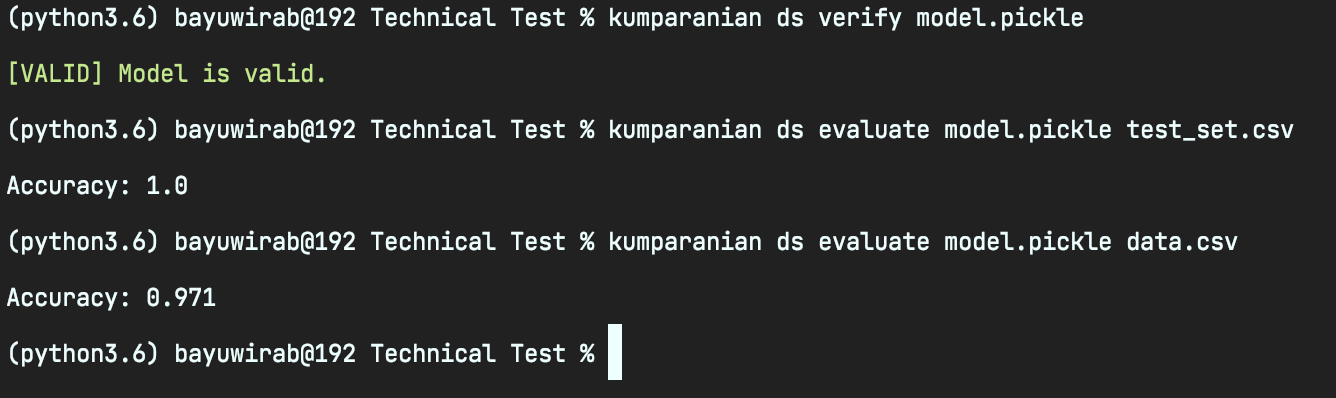